In [254]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importando dados

In [255]:
df_dados = pd.read_csv('dados_clothing.csv', sep=';', decimal=',')
df_dados.head()

,Customer,Type of Customer,Items,Net Sales,Method of Payment,Gender,Marital Status,Age
0,1,Regular,1,39.5,Discover,Male,Married,32
1,2,Promotional,1,102.4,Proprietary Card,Female,Married,36
2,3,Regular,1,22.5,Proprietary Card,Female,Married,32
3,4,Promotional,5,100.4,Proprietary Card,Female,Married,28
4,5,Regular,2,54.0,MasterCard,Female,Married,34


Verificando o range de idade

In [256]:
print(df_dados["Age"].min())
print(df_dados["Age"].max())

20
78


Criando as classes que serão utlizadas baseadas nas idades

In [257]:
classes = [20, 30, 40, 50, 60, 70, 80]

Incluindo colunas 'Faixa idade' para verificar a qual classe de idade o/a cliente pertence e <br>
uma coluna de 'Ticket medio' dividindo a coluna 'Net Sales' pela coluna 'Items'

In [258]:
df_dados['Faixa idade'] = pd.cut(
    x=df_dados['Age'],
    bins=classes,
    include_lowest=True
)
df_dados['Ticket medio'] = df_dados['Net Sales'] / df_dados['Items']
df_dados.head()

,Customer,Type of Customer,Items,Net Sales,Method of Payment,Gender,Marital Status,Age,Faixa idade,Ticket medio
0,1,Regular,1,39.5,Discover,Male,Married,32,"(30.0, 40.0]",39.50
1,2,Promotional,1,102.4,Proprietary Card,Female,Married,36,"(30.0, 40.0]",102.40
2,3,Regular,1,22.5,Proprietary Card,Female,Married,32,"(30.0, 40.0]",22.50
3,4,Promotional,5,100.4,Proprietary Card,Female,Married,28,"(19.999, 30.0]",20.08
4,5,Regular,2,54.0,MasterCard,Female,Married,34,"(30.0, 40.0]",27.00


Fazendo a média da coluna 'Ticket medio' e agrupando por faixa de idade 

In [259]:
media_por_faixa = round(df_dados.groupby('Faixa idade')['Ticket medio'].mean(), 2)

labels = ['20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 a 80 anos']
assert len(labels) == len(media_por_faixa), 'Quantidade de legendas é diferente da quantidade de classe'

C:\Users\gabriel.protti\AppData\Local\Temp\ipykernel_3576\2050964494.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_faixa = round(df_dados.groupby('Faixa idade')['Ticket medio'].mean(), 2)


In [260]:
df_dados_de_media_por_faixa_de_idade = pd.DataFrame({"Faixa de idade":labels, "Ticket Medio":media_por_faixa})
df_dados_de_media_por_faixa_de_idade

,Faixa de idade,Ticket Medio
Faixa idade,,
"(19.999, 30.0]",20 a 29 anos,30.24
"(30.0, 40.0]",30 a 39 anos,29.15
"(40.0, 50.0]",40 a 49 anos,29.25
"(50.0, 60.0]",50 a 59 anos,29.94
"(60.0, 70.0]",60 a 69 anos,27.06
"(70.0, 80.0]",70 a 80 anos,37.52


Plotando as informações em um gráfico de barra

c:\Gabriel\Workspace\Projetos_Python\venvEstatisticaFiap\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Gabriel\Workspace\Projetos_Python\venvEstatisticaFiap\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Gabriel\Workspace\Projetos_Python\venvEstatisticaFiap\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


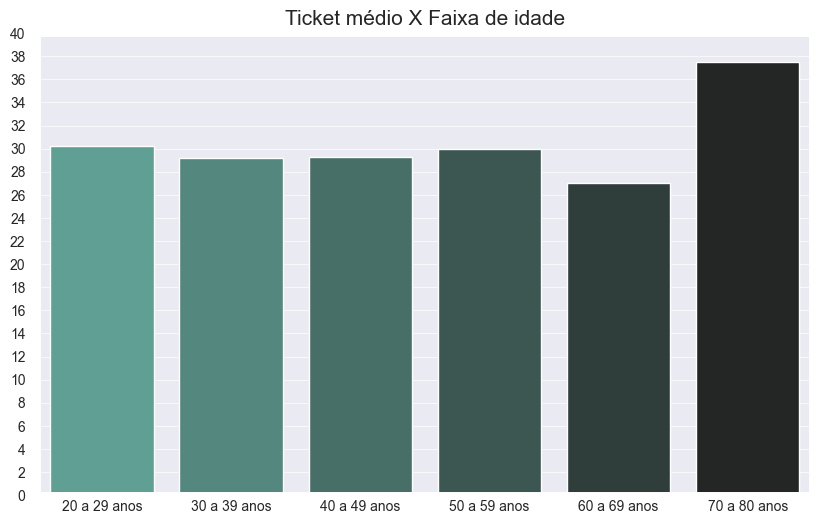

In [261]:
plt.figure(figsize=(10, 6))
sns.set_theme(
    {'font.size': 10.0,
        'axes.labelsize': 14,
        'axes.titlesize': 15,
        'xtick.labelsize': 'medium',
        'ytick.labelsize': 'medium',
        'axes.linewidth': 5,
        'grid.linewidth': 0.5,
        'xtick.major.width': 0.8,
        'ytick.major.width': 0.8,
        'xtick.minor.width': 0.6,
        'ytick.minor.width': 0.6,
        'xtick.major.size': 7,
        'ytick.major.size': 5,
    },
    style={'xtick.direction': 'in',}
)
sns.barplot(
    data=df_dados_de_media_por_faixa_de_idade,
    x='Faixa de idade',
    y='Ticket Medio',
    palette="dark:#5A9_r",    
)
plt.yticks(range(0, int(df_dados_de_media_por_faixa_de_idade['Ticket Medio'].max() + 5), 2))
plt.xlabel(None)
plt.ylabel(None)
plt.title('Ticket médio X Faixa de idade')
plt.show()

Verificando a existência de outliers

In [262]:
qtd_pessoas_por_faixa = df_dados['Faixa idade'].value_counts()
qtd_pessoas_por_faixa

Faixa idade
(40.0, 50.0]      32
(30.0, 40.0]      26
(19.999, 30.0]    18
(50.0, 60.0]      15
(60.0, 70.0]       6
(70.0, 80.0]       3
Name: count, dtype: int64

Inserindo dados no df_dados_de_media_por_faixa_de_idade

In [263]:
df_dados_de_media_por_faixa_de_idade['Qtd pessoas por faixa'] = qtd_pessoas_por_faixa
df_dados_de_media_por_faixa_de_idade

,Faixa de idade,Ticket Medio,Qtd pessoas por faixa
Faixa idade,,,
"(19.999, 30.0]",20 a 29 anos,30.24,18
"(30.0, 40.0]",30 a 39 anos,29.15,26
"(40.0, 50.0]",40 a 49 anos,29.25,32
"(50.0, 60.0]",50 a 59 anos,29.94,15
"(60.0, 70.0]",60 a 69 anos,27.06,6
"(70.0, 80.0]",70 a 80 anos,37.52,3


Eliminando os outliers (faixas de 60 à 80 anos)

In [264]:
df_dados_de_media_por_faixa_de_idade.query('`Faixa de idade` != ("60 a 69 anos", "70 a 80 anos")', inplace=True)
df_dados_de_media_por_faixa_de_idade

,Faixa de idade,Ticket Medio,Qtd pessoas por faixa
Faixa idade,,,
"(19.999, 30.0]",20 a 29 anos,30.24,18
"(30.0, 40.0]",30 a 39 anos,29.15,26
"(40.0, 50.0]",40 a 49 anos,29.25,32
"(50.0, 60.0]",50 a 59 anos,29.94,15


Plotando as novas informações sem os outliers

c:\Gabriel\Workspace\Projetos_Python\venvEstatisticaFiap\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Gabriel\Workspace\Projetos_Python\venvEstatisticaFiap\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Gabriel\Workspace\Projetos_Python\venvEstatisticaFiap\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


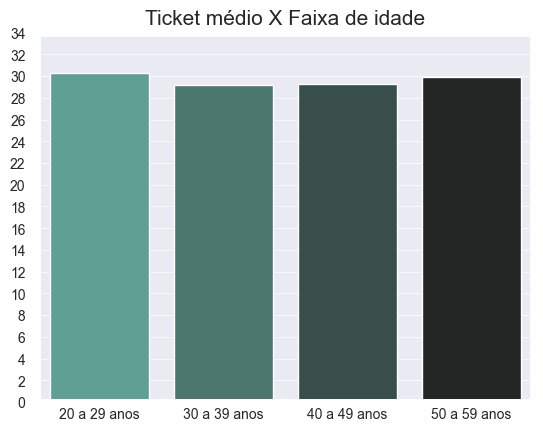

In [265]:
sns.set_theme(
    {'axes.titlesize': 15},
    style={'xtick.direction': 'in',}
)
sns.barplot(
    data=df_dados_de_media_por_faixa_de_idade,
    x='Faixa de idade',
    y='Ticket Medio',
    palette="dark:#5A9_r",    
)
plt.yticks(range(0, int(df_dados_de_media_por_faixa_de_idade['Ticket Medio'].max() + 5), 2))
plt.xlabel(None)
plt.ylabel(None)
plt.title('Ticket médio X Faixa de idade')
plt.show()


A partir da análise descritiva da base de dados da loja de artigos femininos Pelican Store é possivel
observar que o ticket médio por artigo na faixa dos 20 aos 59 anos está dentro de um range de 29.15 
dólares até 30.24 dólares aproximadamente, sendo assim é possível que se o preço de seus artigos se 
distanciem muito desse range de preço, a quantidade de vendas possam vir a cair. Seria interessante 
também focar suas campanhas de marketing para venda de seus produtos para as mulheres de 20 a 59 anos.

<h2>Analise de pagamento com cartão próprio x cartão externo, por tipo de cliente<h2>

In [267]:
df_dados.head(10)

,Customer,Type of Customer,Items,Net Sales,Method of Payment,Gender,Marital Status,Age,Faixa idade,Ticket medio
0,1,Regular,1,39.50,Discover,Male,Married,32,"(30.0, 40.0]",39.50
1,2,Promotional,1,102.40,Proprietary Card,Female,Married,36,"(30.0, 40.0]",102.40
2,3,Regular,1,22.50,Proprietary Card,Female,Married,32,"(30.0, 40.0]",22.50
3,4,Promotional,5,100.40,Proprietary Card,Female,Married,28,"(19.999, 30.0]",20.08
4,5,Regular,2,54.00,MasterCard,Female,Married,34,"(30.0, 40.0]",27.00
5,6,Regular,1,44.50,MasterCard,Female,Married,44,"(40.0, 50.0]",44.50
6,7,Promotional,2,78.00,Proprietary Card,Female,Married,30,"(19.999, 30.0]",39.00
7,8,Regular,1,22.50,Visa,Female,Married,40,"(30.0, 40.0]",22.50
8,9,Promotional,2,56.52,Proprietary Card,Female,Married,46,"(40.0, 50.0]",28.26
9,10,Regular,1,44.50,Proprietary Card,Female,Married,36,"(30.0, 40.0]",44.50


In [277]:
tipo_cartao_cliente = df_dados.groupby('Type of Customer')['Method of Payment'].value_counts()
pd.DataFrame(tipo_cartao_cliente)

count
Type of Customer Method of Payment       
Promotional      Proprietary Card      57
                 MasterCard             7
                 Visa                   5
                 American Express       1
Regular          Proprietary Card      13
                 MasterCard             7
                 Visa                   5
                 Discover               4
                 American Express       1